### importing libraries and reading the dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#reading the csv data as pandas dataframe
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [3]:
#show top 5 records
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
# shape of the dataset
df.shape

(246, 14)

In [5]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Data Cleaning 

In [6]:
#dropping unwanted rows 
df.drop(index=[122,123], inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
#after dopping rows shape of the dataset
df.shape

(244, 14)

In [8]:
#creating a new column region 
df.loc[0:121 , "region"]= "Bejaia region"
df.loc[121: , "region" ]= "Sidi Bel-abbes"

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia region
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia region
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia region
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia region
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia region


In [10]:
#columns of the dataset
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [11]:
#stripping the columns name as it has unwanted spaces
df.columns = [i.strip() for i in df.columns ]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [12]:
#stripping the white spaces from all the features values
for column in df.columns:
    df[column]=df[column].str.strip()

In [13]:
# checking for null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [14]:
#checking which row having null value
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi Bel-abbes


In [15]:
df.at[165, 'FWI']=df['FWI'].mode()#replcing fire with mode of FWI
df.at[165, 'DC']=14.6# removing white space 
df.at[165, 'Classes']='fire'# replacing the null value

In [16]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [17]:

# applying label encoding to convert categorical features into numerical features
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
df['Classes']=LabelEncoder.fit_transform(df['Classes'])
df['region']=LabelEncoder.fit_transform(df['region'])

In [18]:
#converting the data types 
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['FWI']=df['FWI'].astype(float)

In [19]:
#checking the information after converting the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int32  
 14  region       244 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 21.1 KB


In [20]:
# making a copy of the dataset after cleaning the data
df_copy = df.copy()
df_copy

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


### Statistical Analysis

In [21]:
df_copy.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4


### Exploring Data

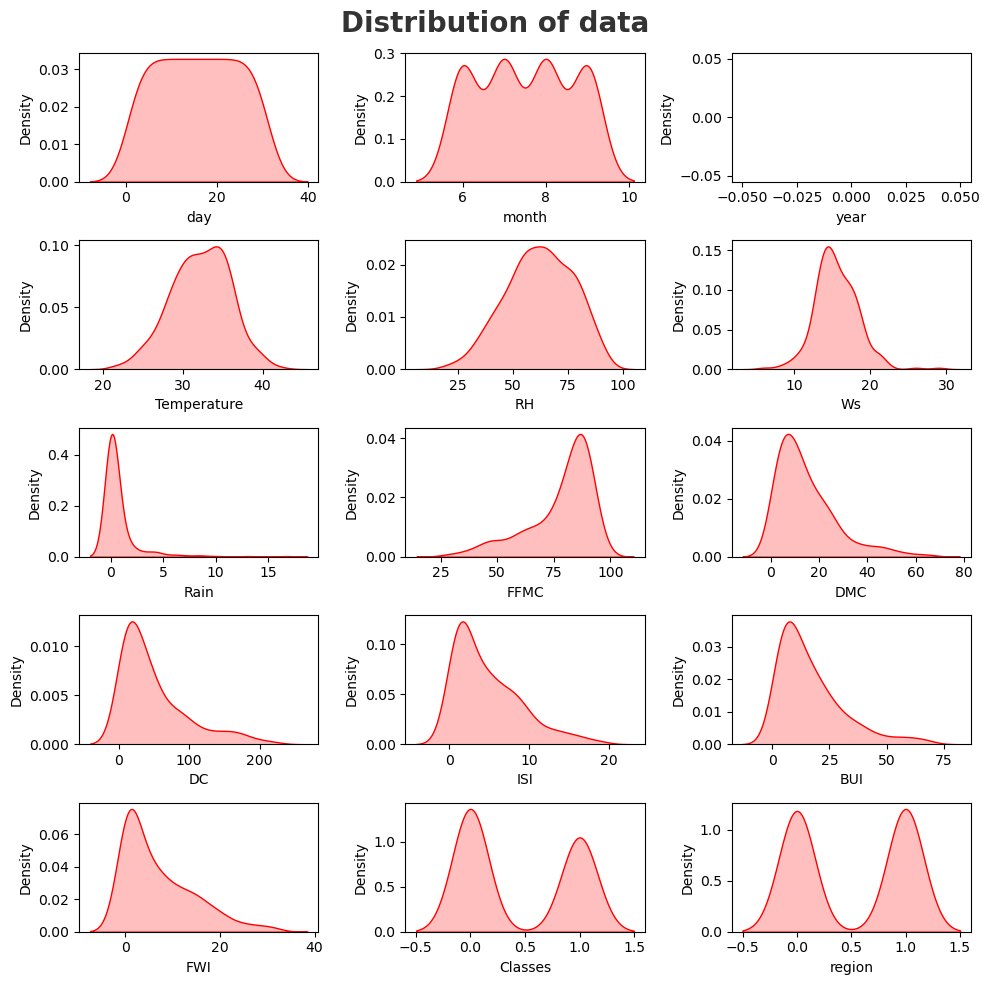

In [22]:
# check the ditribution for every columns
plt.figure(figsize=(10, 10))
plt.suptitle('Distribution of data', fontsize=20, fontweight='bold', alpha=0.8)
plot=1
for column in df_copy:
    if plot<=15:
        plt.subplot(5, 3, plot)
        sns.kdeplot(x=df_copy[column],shade=True, color='r')
        plt.xlabel(column)
        plt.tight_layout()
    plot+=1

### Observations:
- Rain, DC, ISI, DMC,BUI and FWI are right skewed while FFMC is letf skewed
- No variance in year 

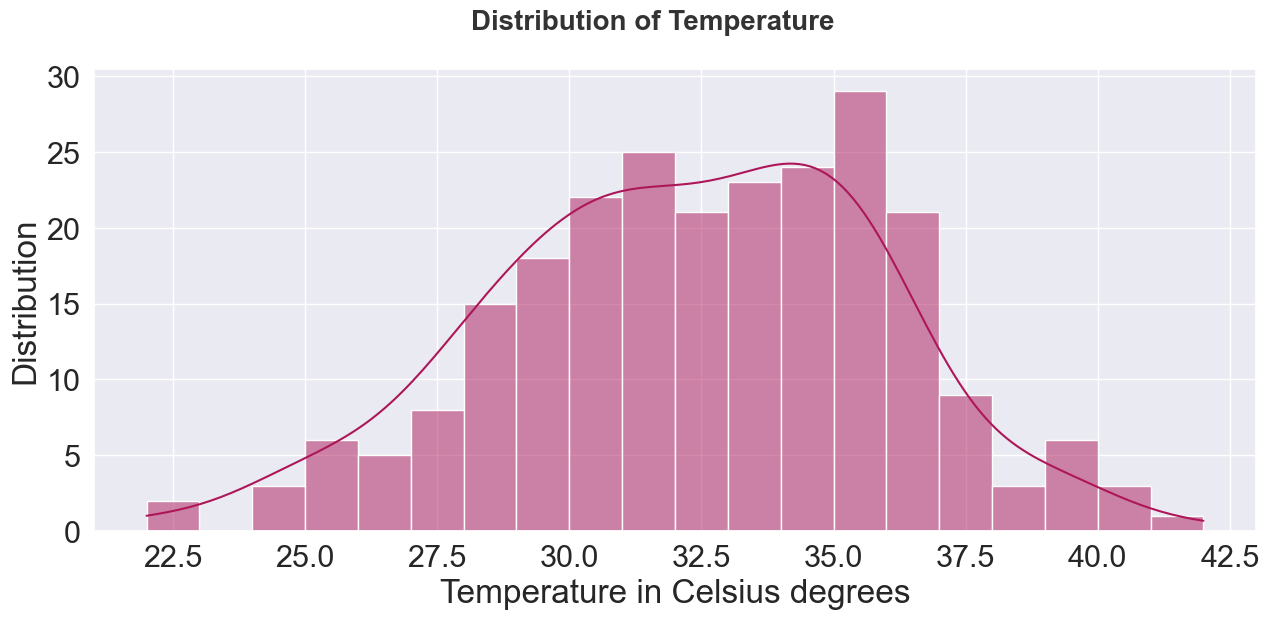

In [23]:
plt.figure(figsize=(15,6))
plt.suptitle('Distribution of Temperature ', fontsize=20, fontweight='bold', alpha=0.8)
sns.set(font_scale=2)
plt.xlabel('Temperature in Celsius degrees')
plt.ylabel('Distribution')
sns.histplot(df_copy['Temperature'], bins=20, kde=True, color='#AD1759')
plt.show()

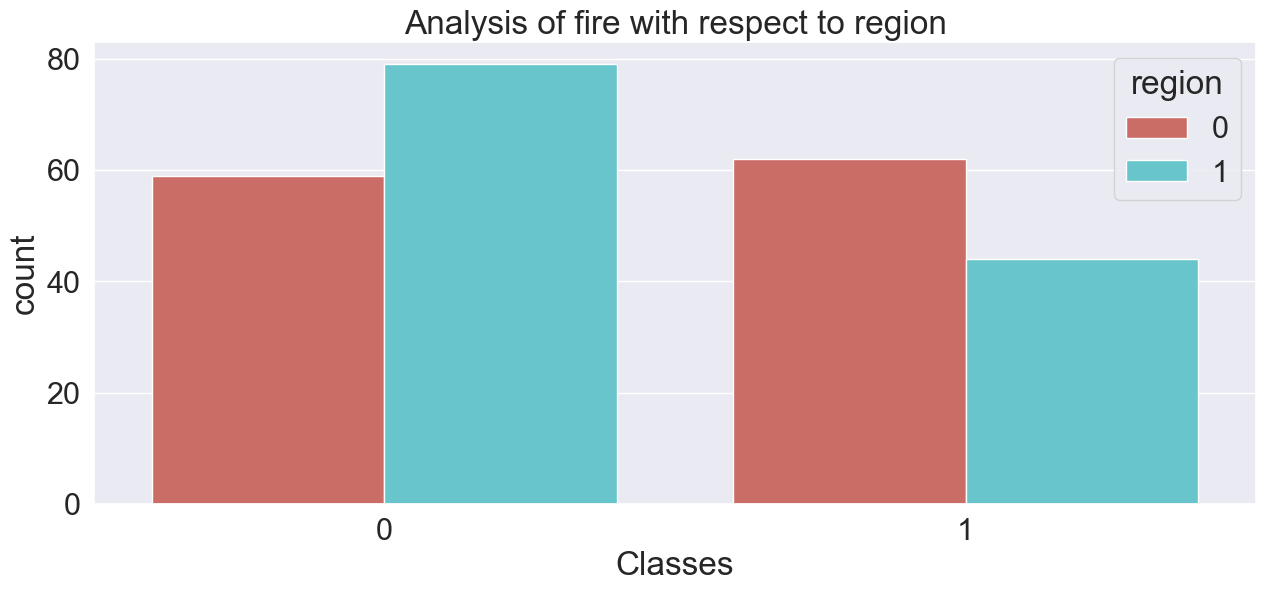

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(x=df_copy['Classes'],data =df_copy,hue=df_copy['region'], palette='hls')
plt.title('Analysis of fire with respect to region')
plt.xticks()
plt.show()

### Observation:
- Sidi Bel-abbes region has more fire compared to Bejaia region

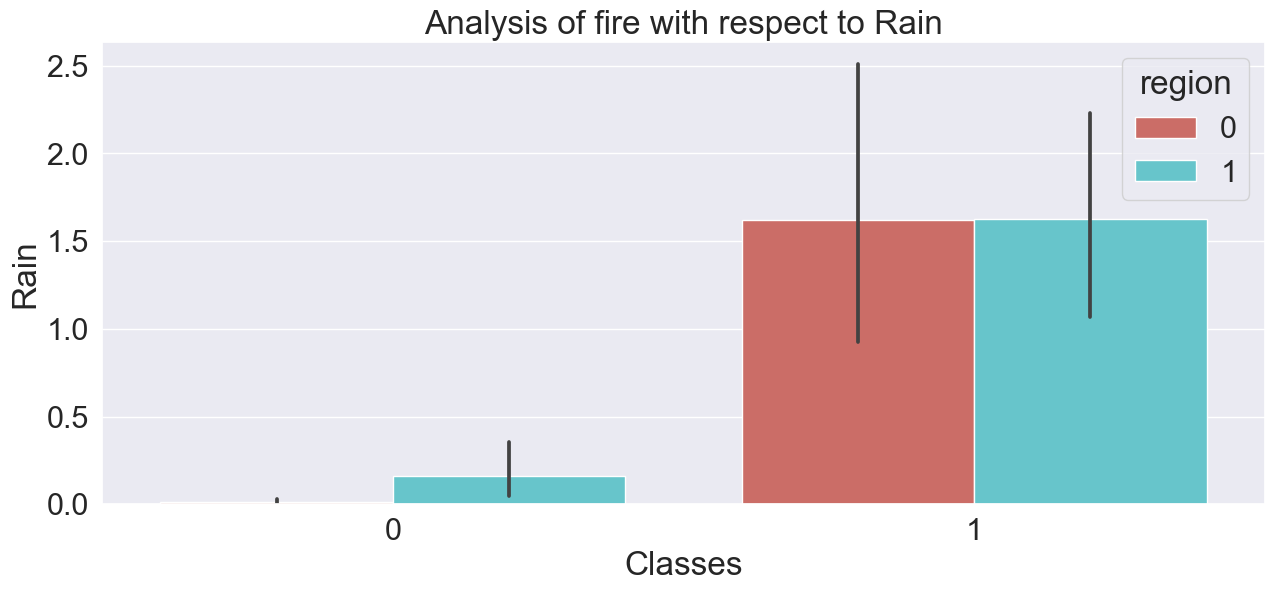

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_copy['Classes'],y = df_copy['Rain'],data =df_copy,hue=df_copy['region'], palette='hls')
plt.title('Analysis of fire with respect to Rain')
plt.xticks()
plt.show()

### Observations:
- the region has heavy rain does not effected by fire

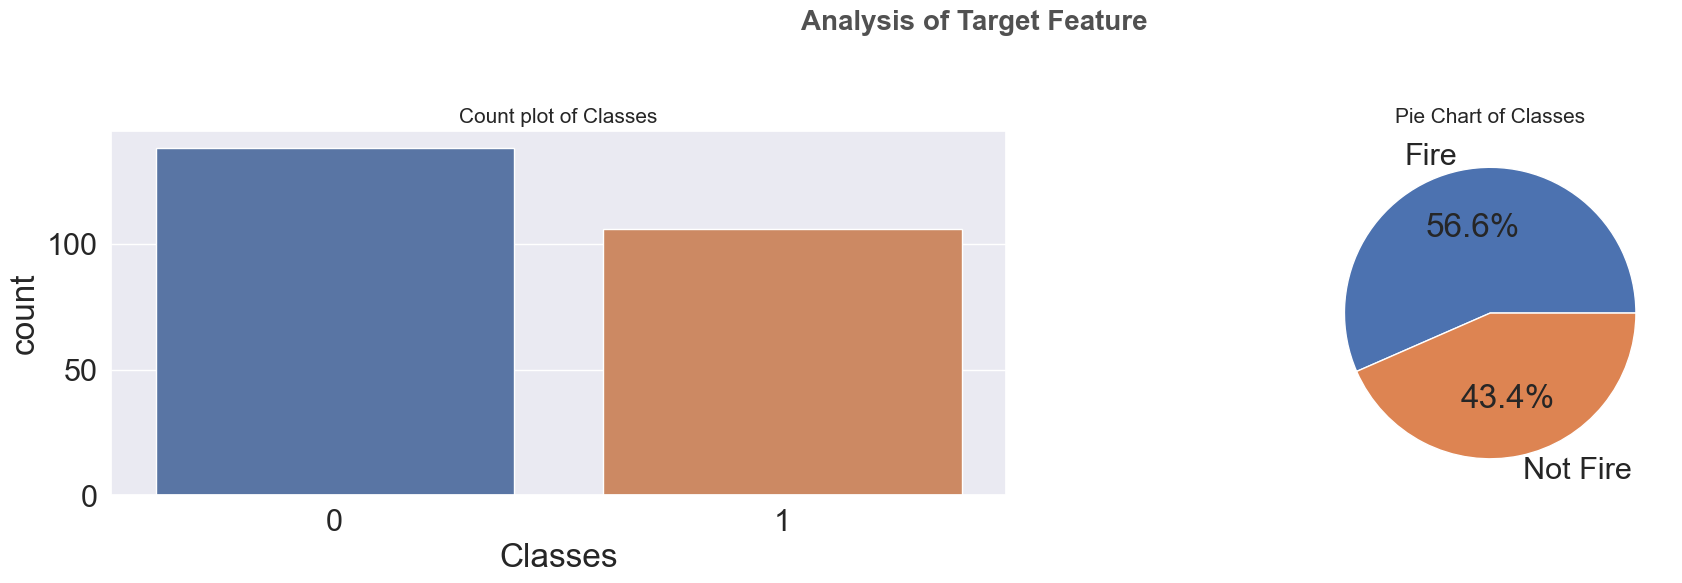

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plt.suptitle('Analysis of Target Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

plt.subplot(2, 2, 1)
sns.countplot(x=df_copy['Classes'])
plt.title("Count plot of Classes", fontsize=15)

# percentage for pie chart
percentage=df.Classes.value_counts(normalize=True)*100

plt.subplot(2, 2, 2)
classes_labels=['Fire','Not Fire']
plt.pie(percentage, labels=classes_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)


plt.tight_layout()
plt.show()

### Observations:
- From the above plots we can say that the data is not imbalanced

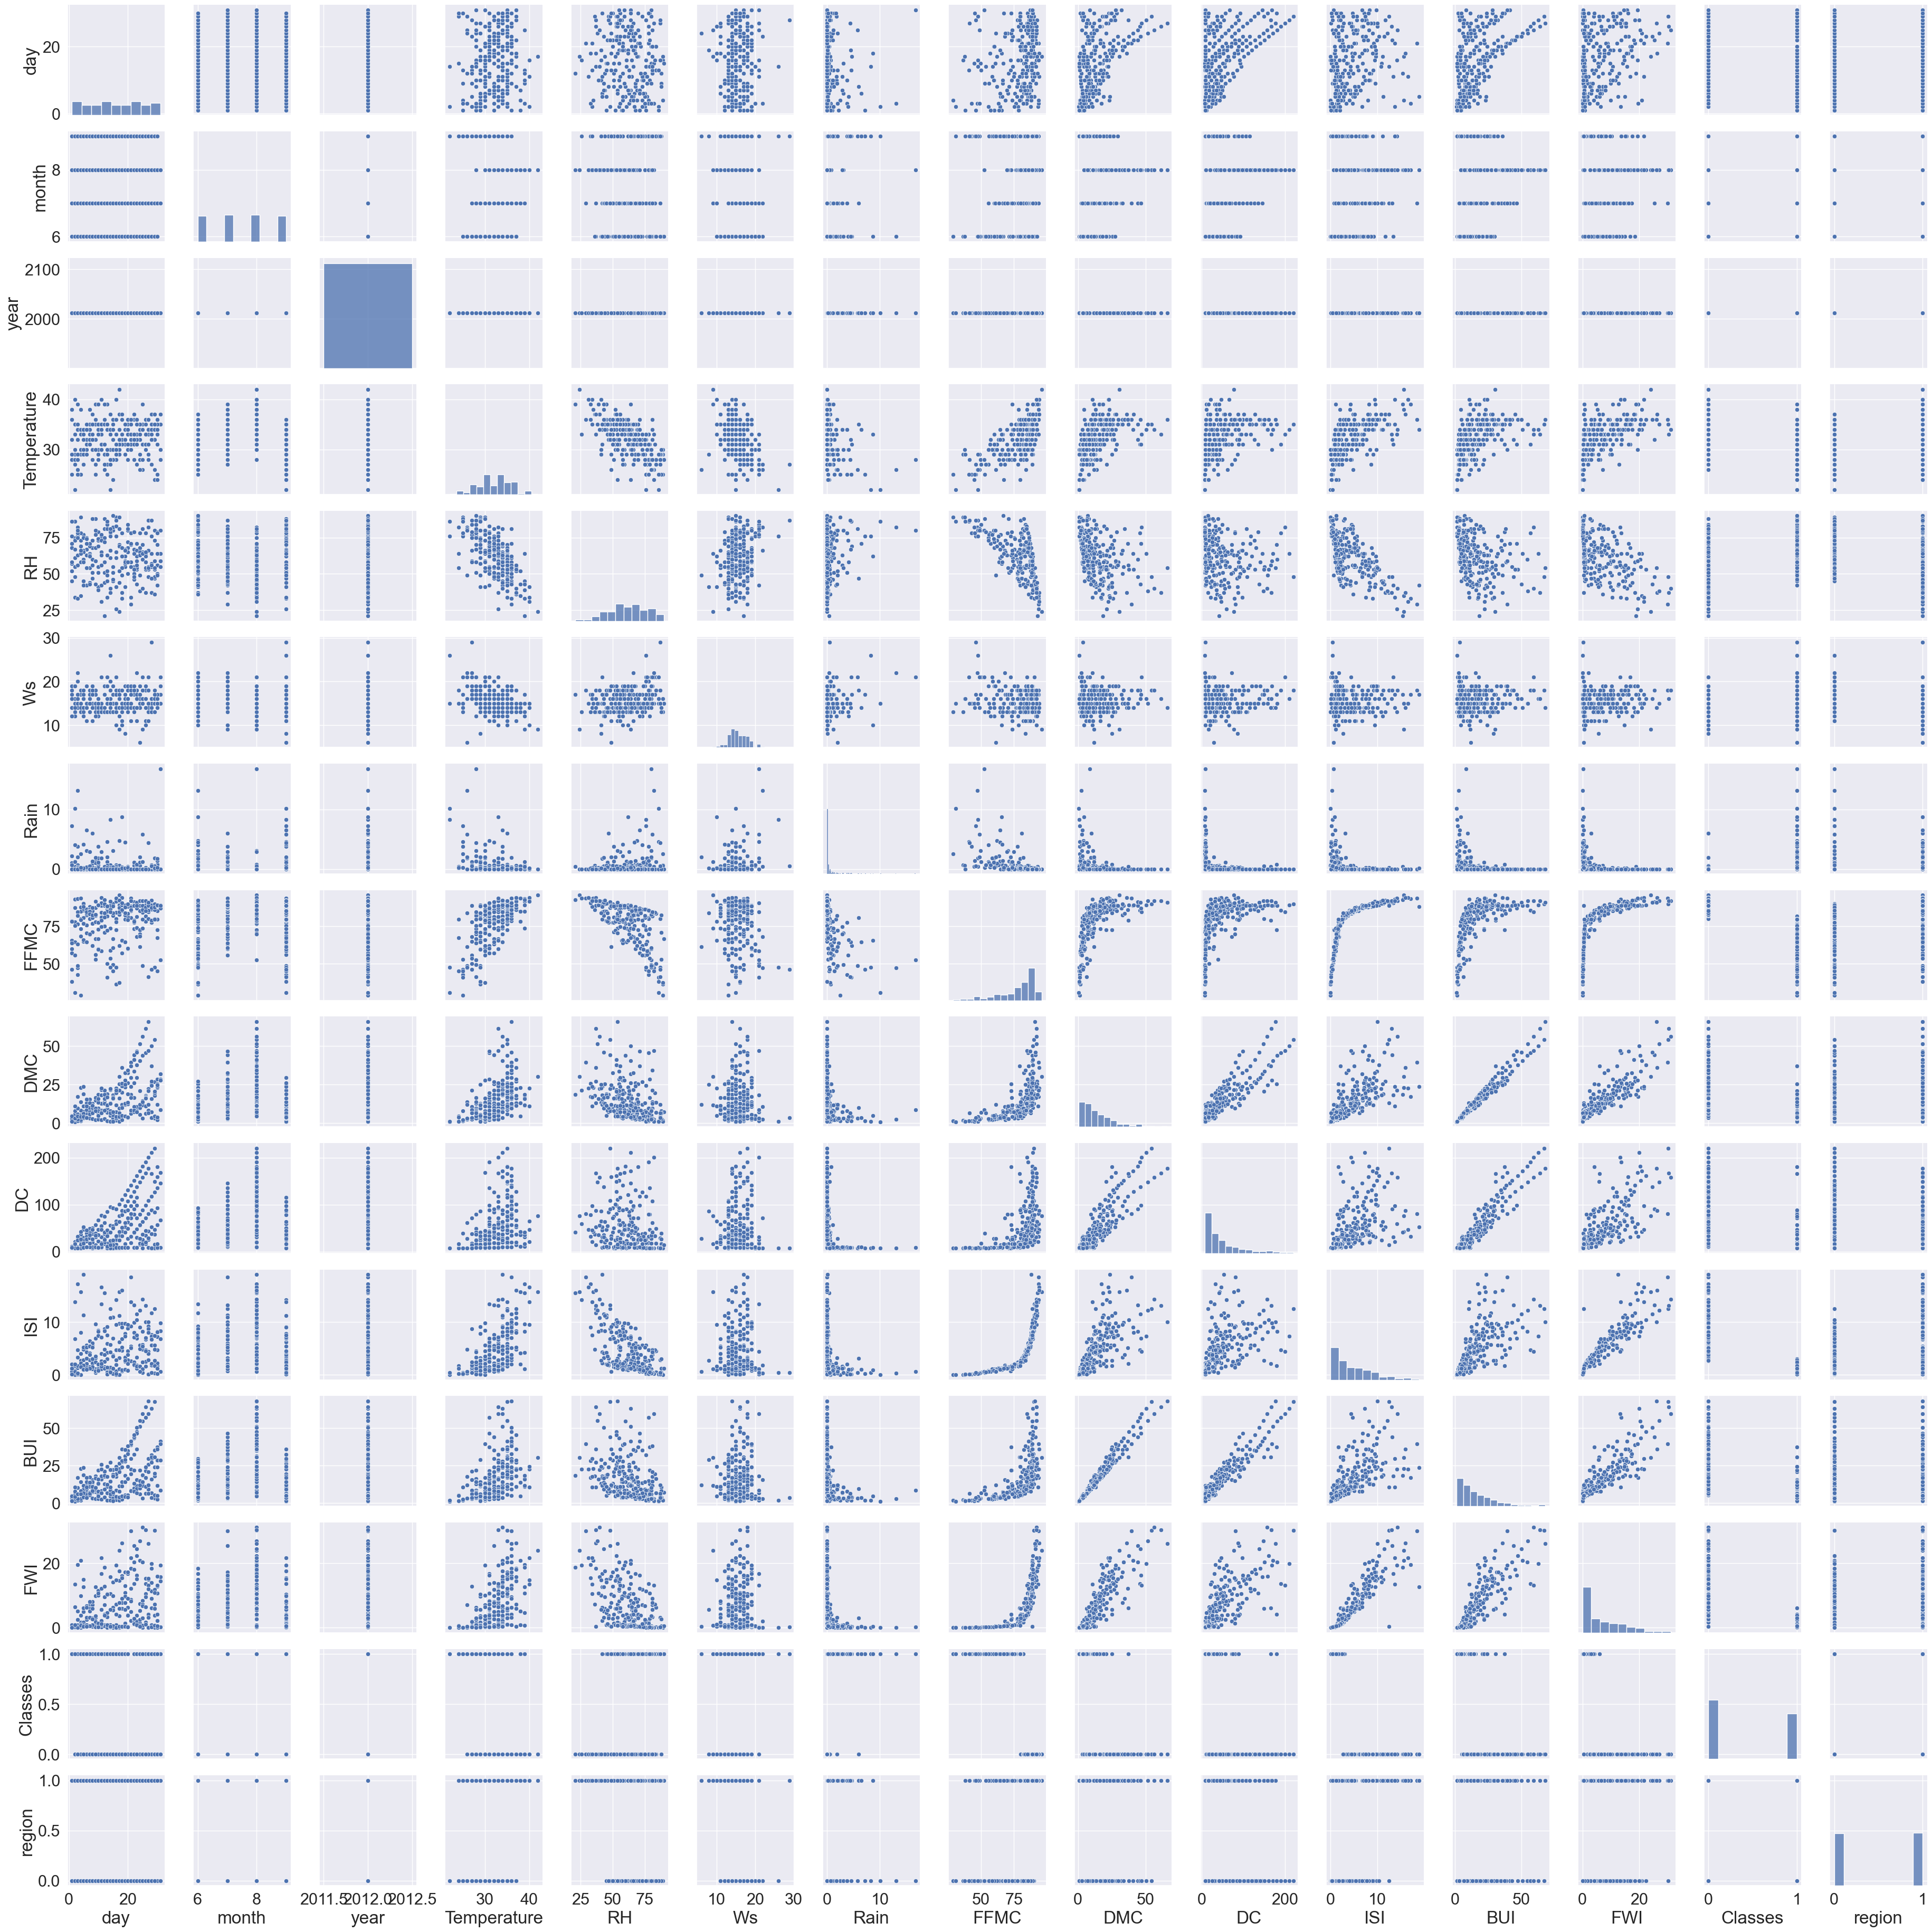

In [27]:
sns.pairplot(df_copy)

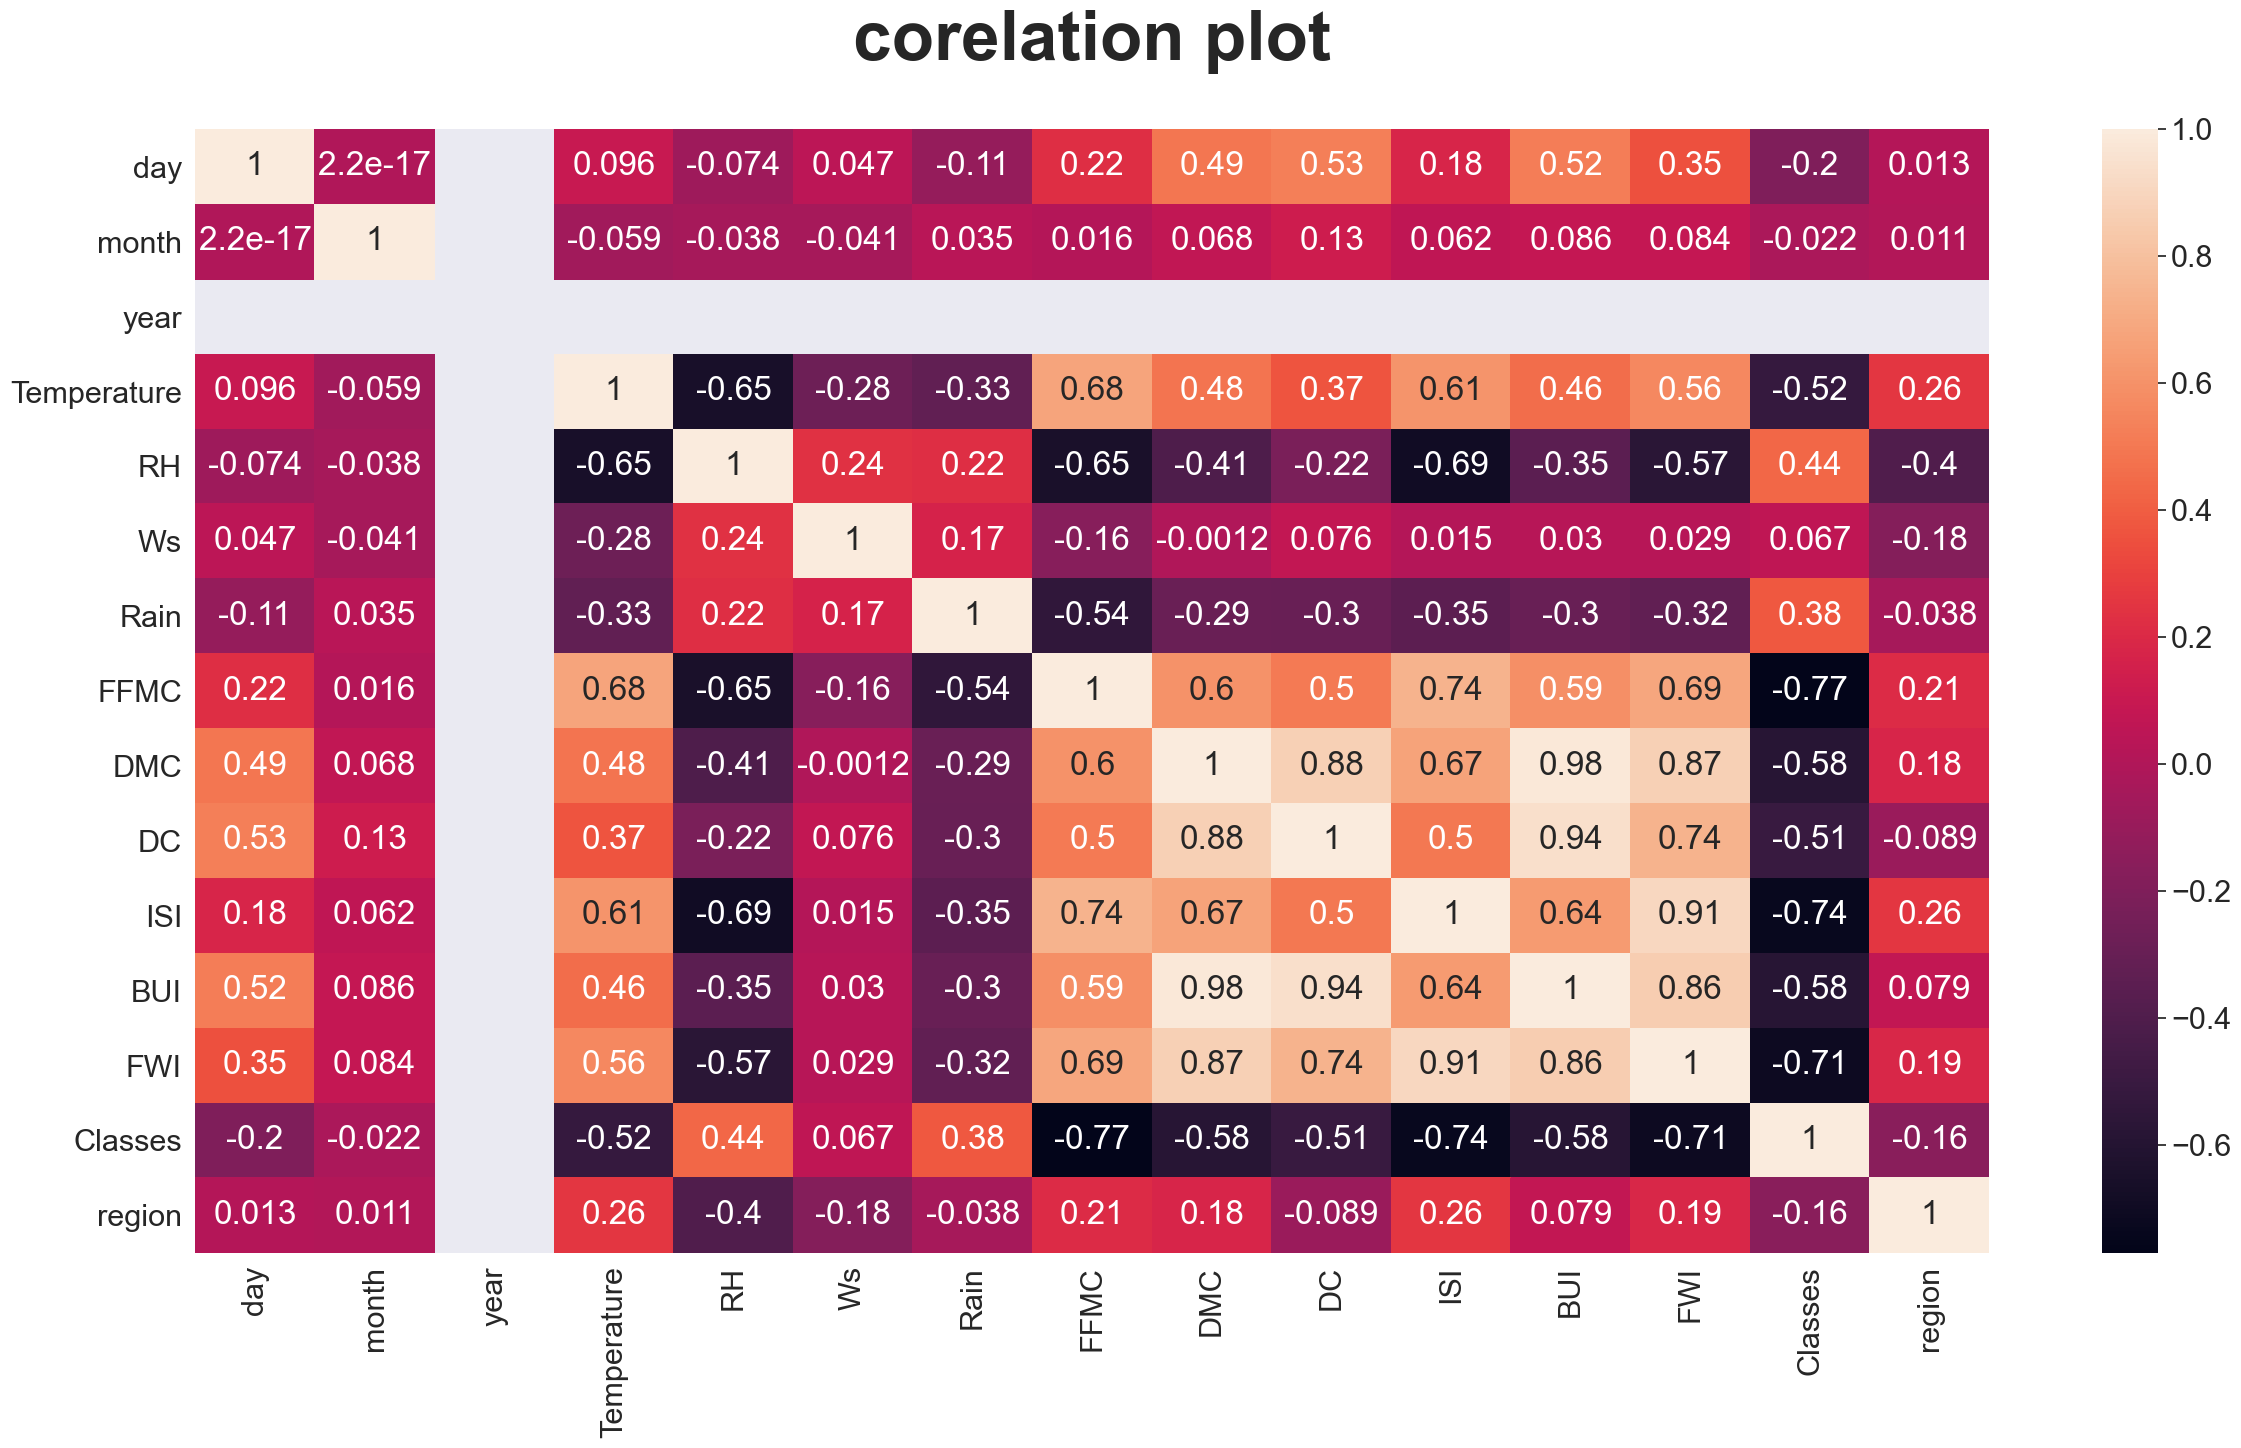

In [28]:

plt.figure(figsize = (25, 15))
plt.title('corelation plot',  fontsize=50, fontweight='bold', alpha=1, pad=50)
sns.heatmap(df_copy.corr(), annot=True)
plt.tight_layout()

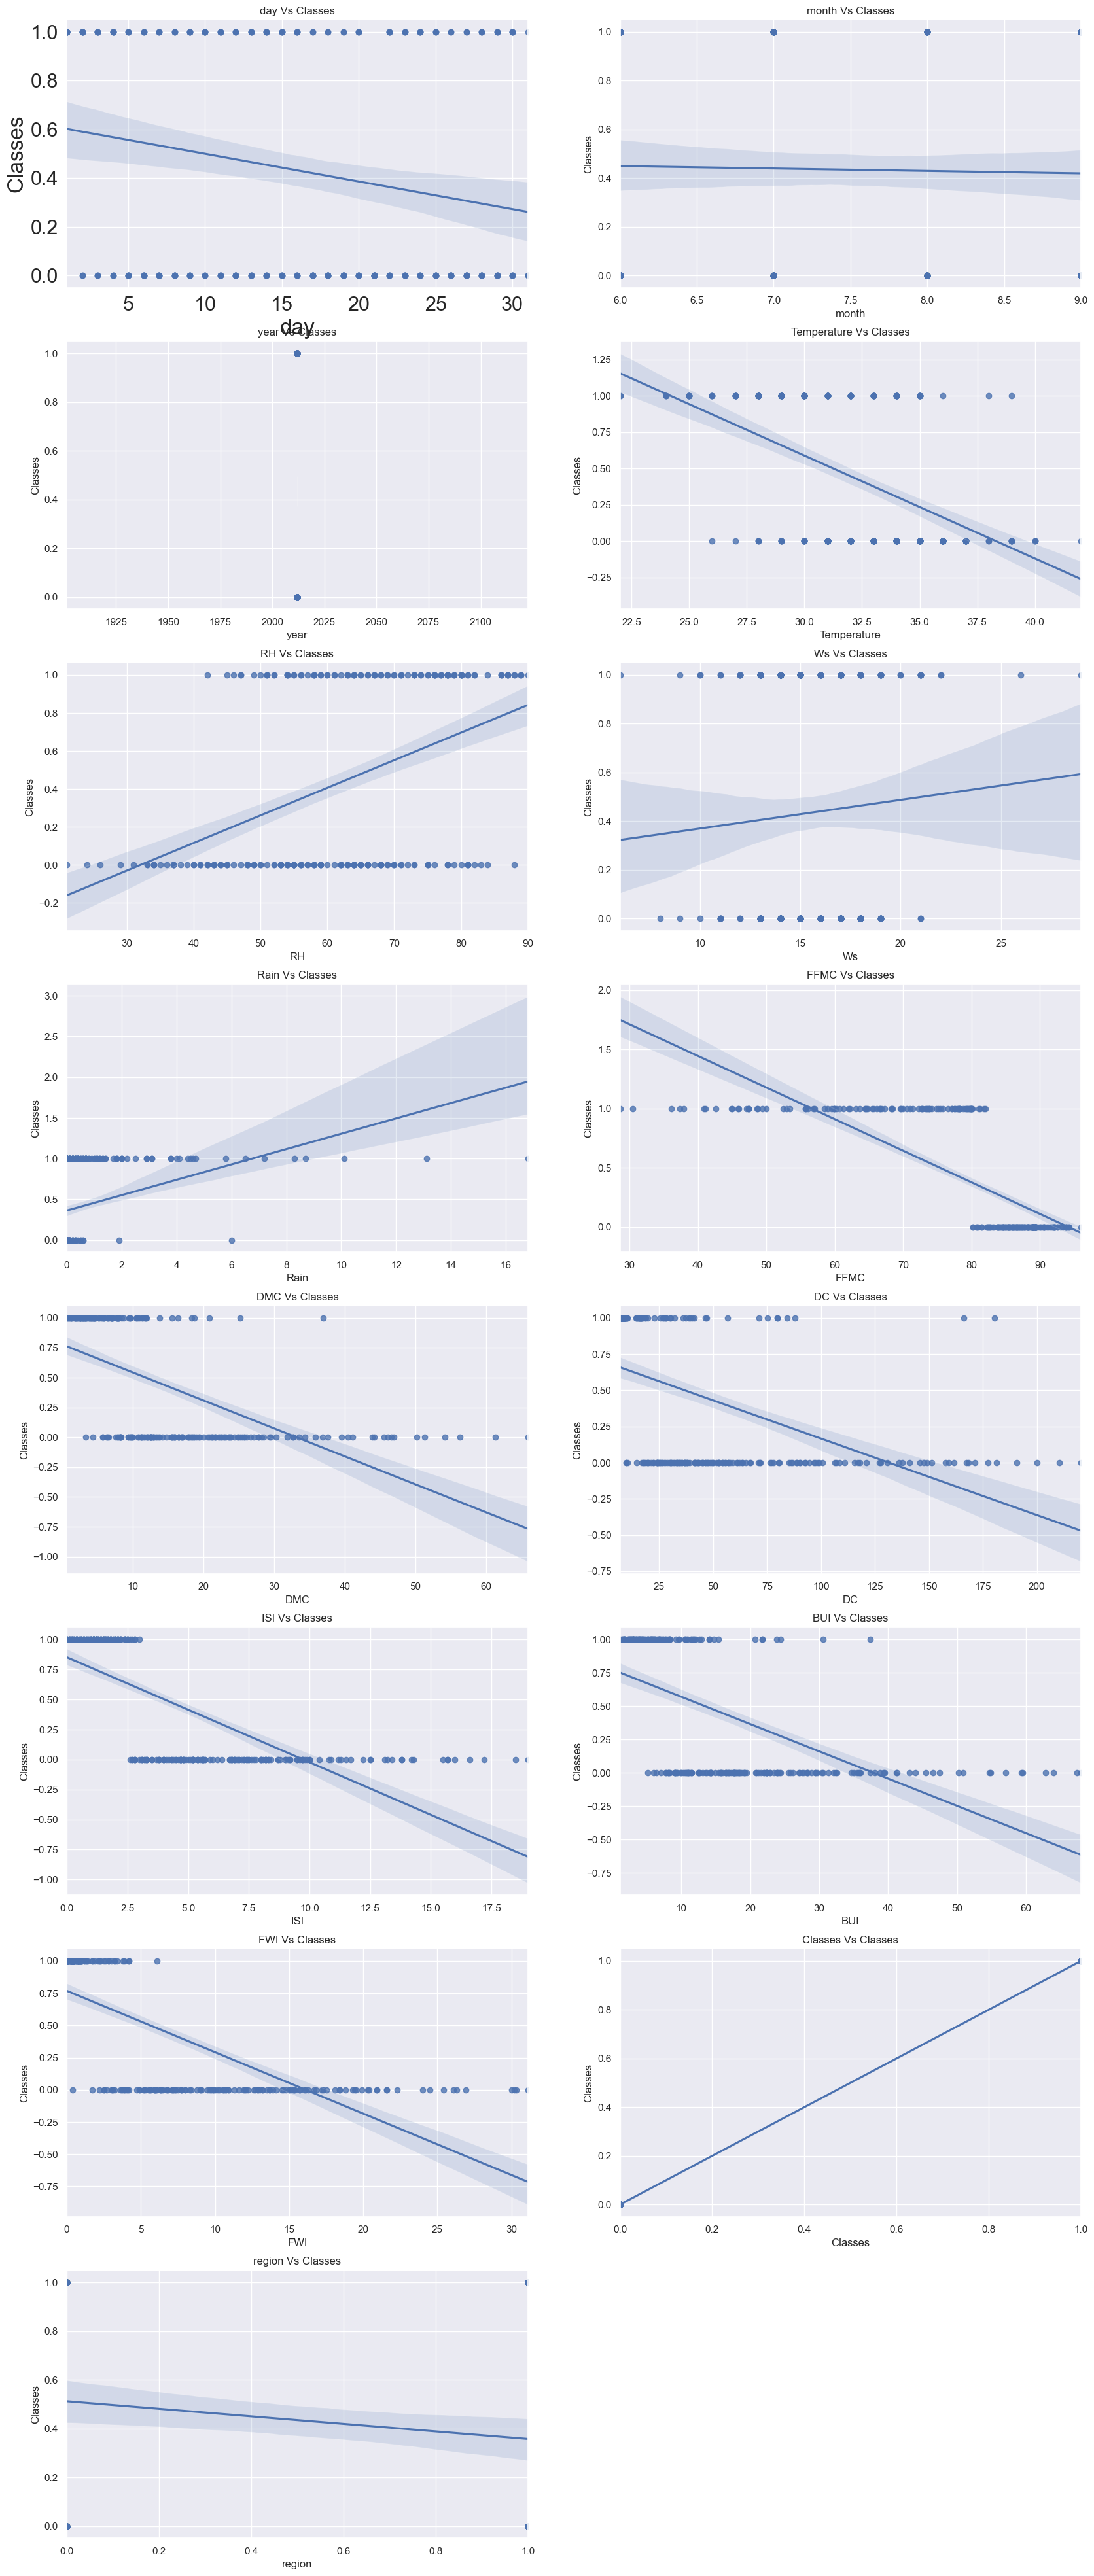

In [29]:
plt.figure(figsize=(20, 50))

plot=1
for column in df_copy:
    if plot<=15:
        ax=plt.subplot(8, 2, plot)
        sns.set(rc={'figure.figsize':(8,10)})
        sns.regplot(data=df_copy,x=df_copy[column],y=df_copy['Classes'])
        plt.xlabel(column)
        plt.title('{} Vs Classes'.format(column))
    plot+=1
plt.show()

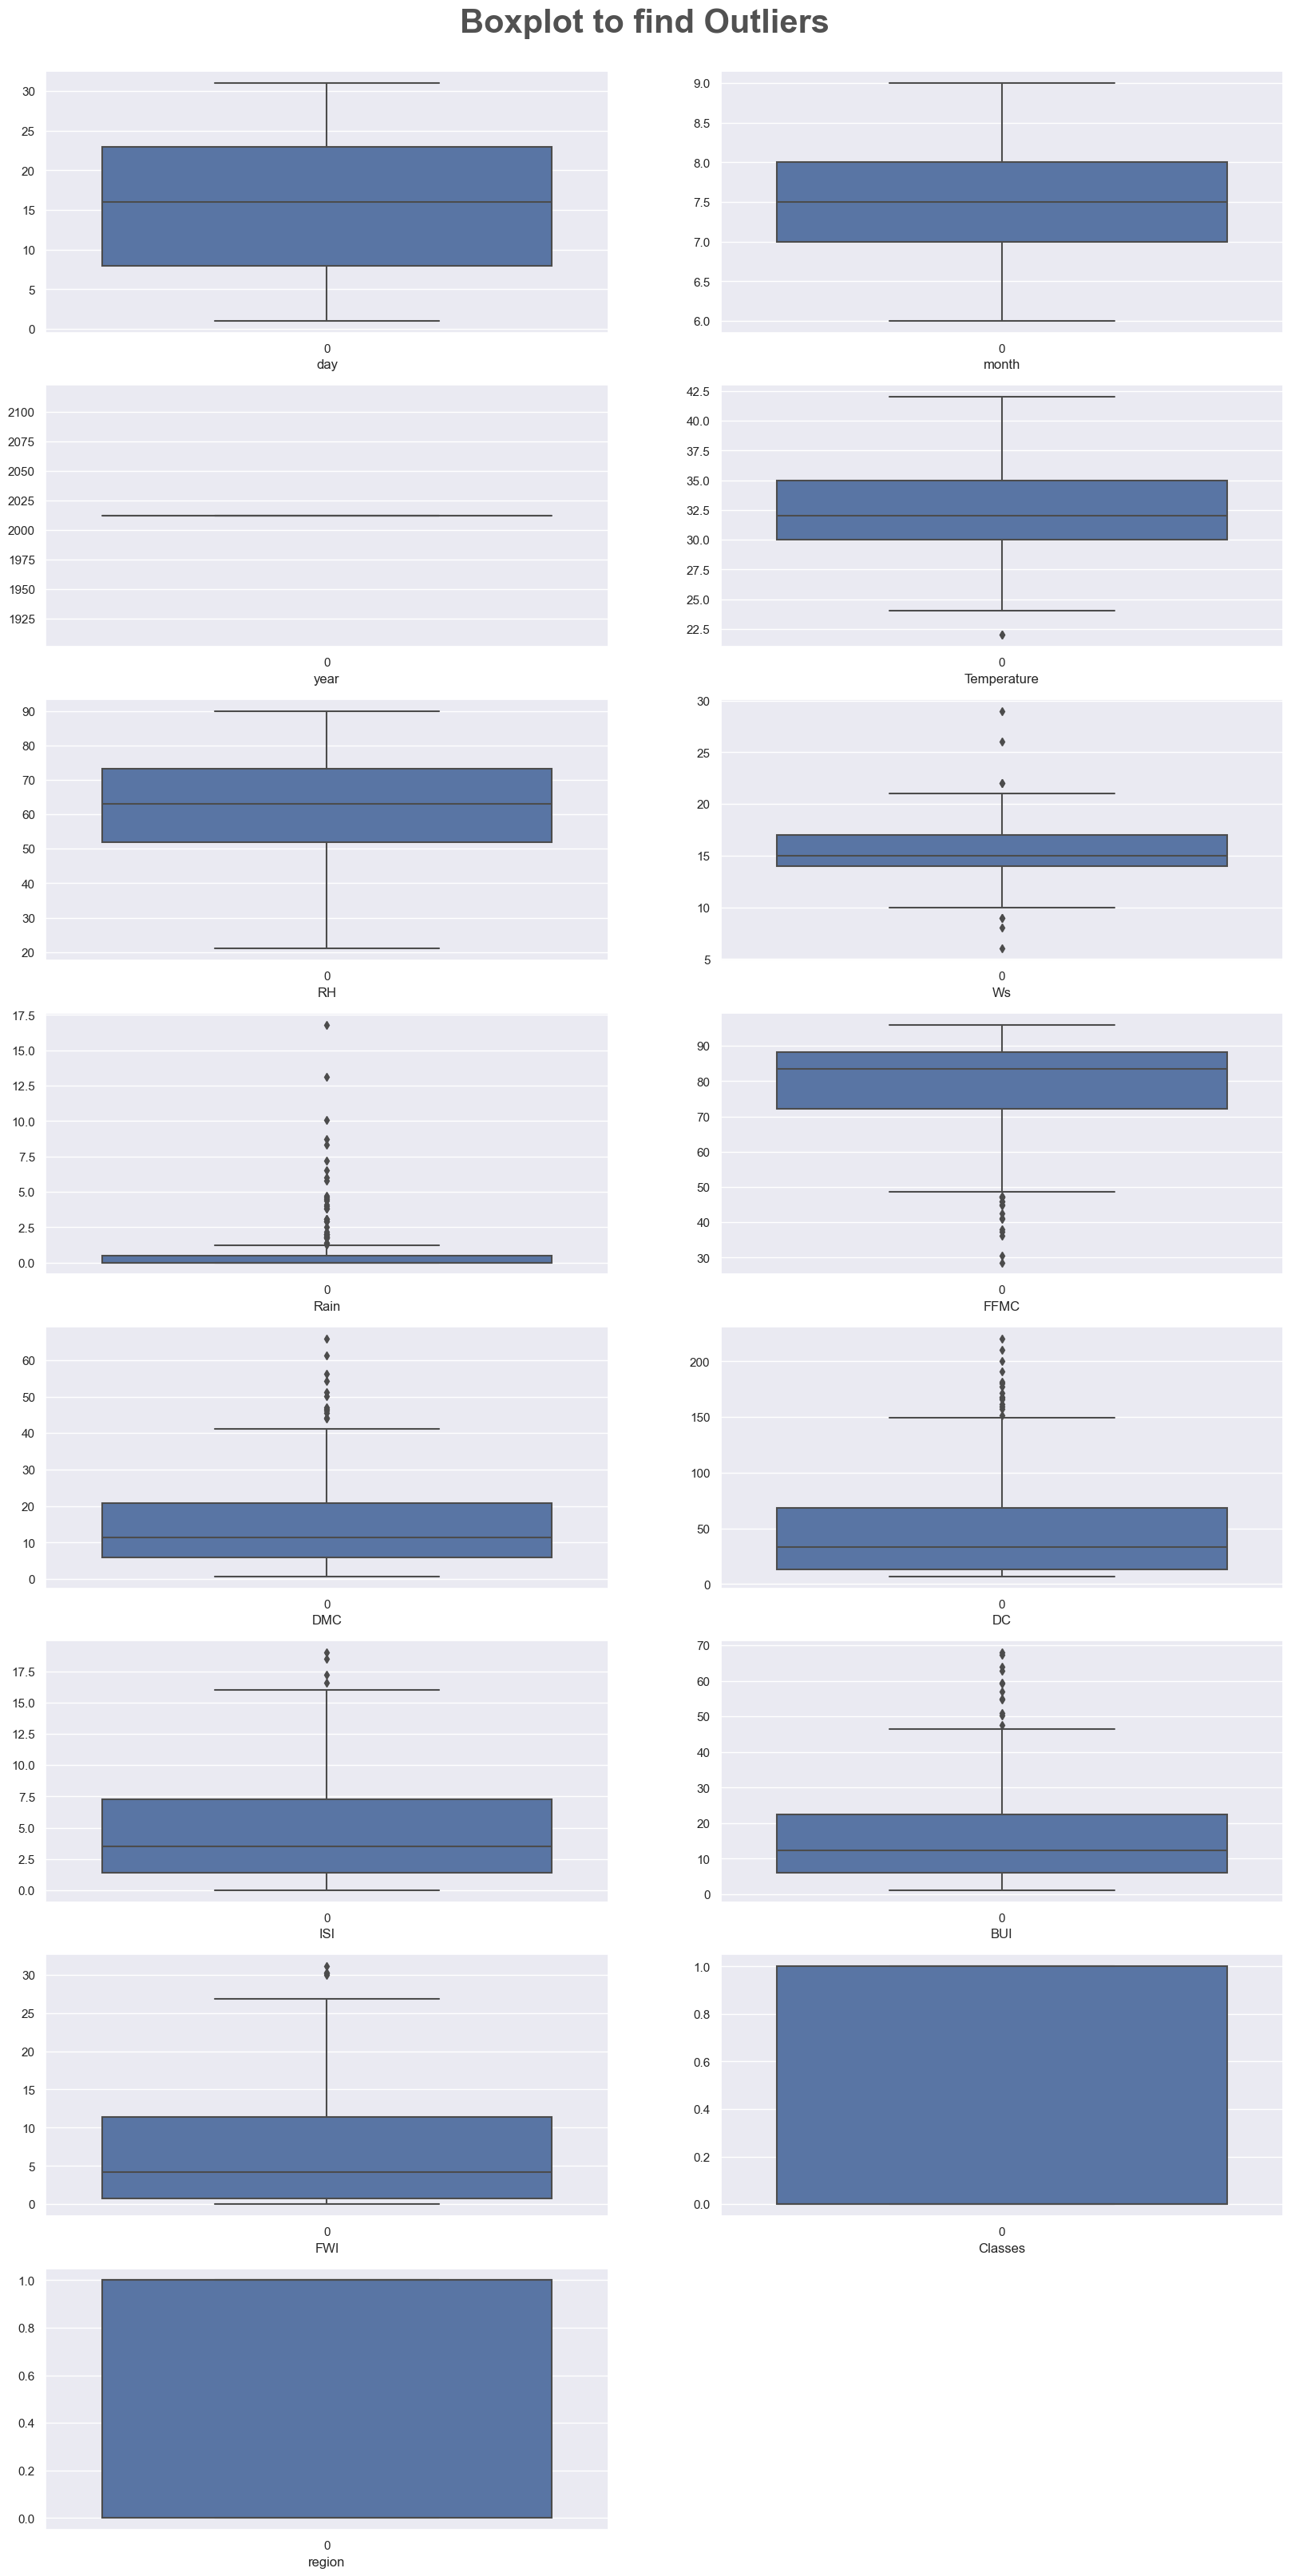

In [30]:
plt.figure(figsize=(20, 40))
plt.suptitle('Boxplot to find Outliers', fontsize=30, fontweight='bold', alpha=0.8, y=0.90)
plot=1
for column in df_copy:
    if plot<=15:
        ax=plt.subplot(8, 2, plot)
        
        sns.boxplot(data=df_copy[column])
        plt.xlabel(column)
        
    plot+=1

### Objectives:
-WS, Rain, FFMC, DC, DMC, and BUI have many outliers

In [31]:
#removing the outliers
def outliers_imputation_mild(data,column):
    IQR= data[column].quantile(0.75)-data[column].quantile(0.25)
    lower_fence=data[column].quantile(0.25)-(IQR*1.5)
    upper_fence=data[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower fence {column}:", lower_fence)
    print(f"Upper fence {column}:", upper_fence)
    print("_____________________________________")
    data.loc[data[column]<=lower_fence,column]=lower_fence
    data.loc[data[column]>=upper_fence,column]=upper_fence

In [32]:
columns=df_copy.columns
for col in columns:
    outliers_imputation_mild(df_copy,col)

IQR: 15.0
Lower fence day: -14.5
Upper fence day: 45.5
_____________________________________
IQR: 1.0
Lower fence month: 5.5
Upper fence month: 9.5
_____________________________________
IQR: 0.0
Lower fence year: 2012.0
Upper fence year: 2012.0
_____________________________________
IQR: 5.0
Lower fence Temperature: 22.5
Upper fence Temperature: 42.5
_____________________________________
IQR: 21.25
Lower fence RH: 20.125
Upper fence RH: 105.125
_____________________________________
IQR: 3.0
Lower fence Ws: 9.5
Upper fence Ws: 21.5
_____________________________________
IQR: 0.5
Lower fence Rain: -0.75
Upper fence Rain: 1.25
_____________________________________
IQR: 16.224999999999994
Lower fence FFMC: 47.73750000000001
Upper fence FFMC: 112.63749999999999
_____________________________________
IQR: 14.95
Lower fence DMC: -16.624999999999996
Upper fence DMC: 43.175
_____________________________________
IQR: 54.87500000000001
Lower fence DC: -69.03750000000002
Upper fence DC: 150.462500000

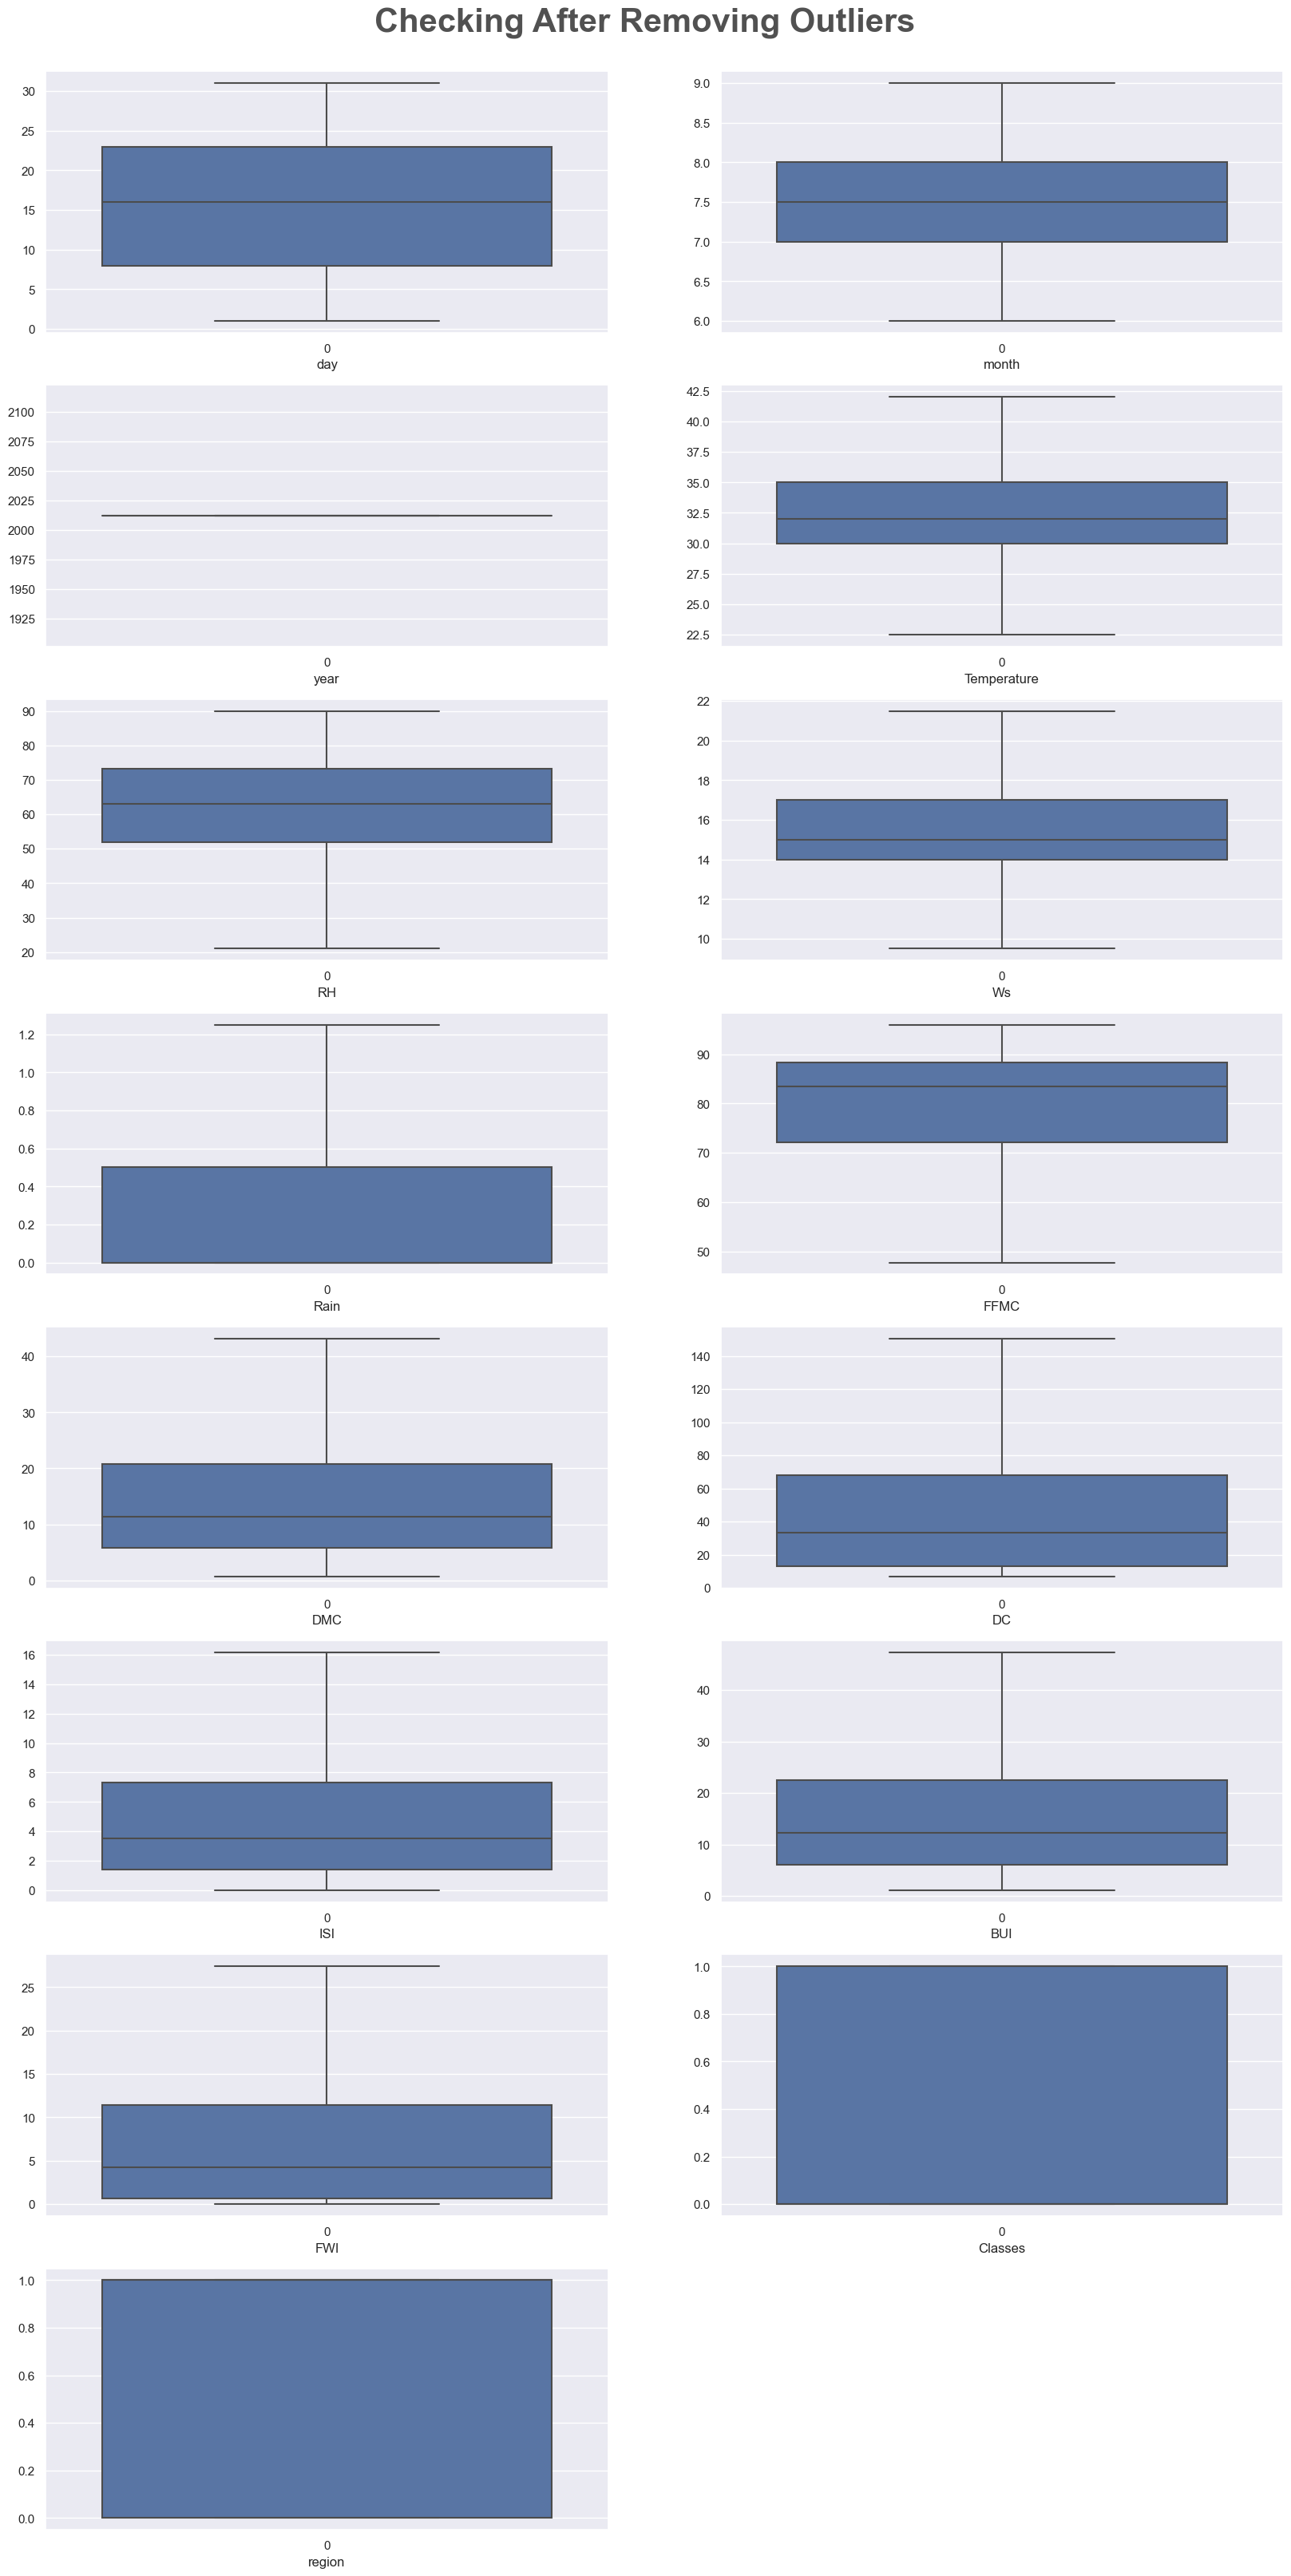

In [33]:
plt.figure(figsize=(20, 40))
plt.suptitle('Checking After Removing Outliers', fontsize=30, fontweight='bold', alpha=0.8, y=0.90)
plot=1
for column in df_copy:
    if plot<=15:
        ax=plt.subplot(8, 2, plot)
        
        sns.boxplot(data=df_copy[column])
        plt.xlabel(column)
        
    plot+=1

### Creating dependent and independent features

In [34]:
X=df_copy.drop(columns=['Classes'])
y=df_copy['Classes']

In [35]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,2012.0,26.0,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0.0


In [36]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Classes, dtype: float64

### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

###  Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic regression model training

In [39]:
from sklearn.linear_model import LogisticRegression
Logistic_regression = LogisticRegression()
Logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = Logistic_regression.predict(X_test)

In [41]:
y_pred

array([0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])

### Accuracy score

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9672131147540983

### Classification Report

In [43]:
from sklearn.metrics import classification_report
score=accuracy_score(y_test,y_pred)
Classification_Report = classification_report(y_test,y_pred)

print("Logistic Regression")
print ("Accuracy Score : {:.4f}".format(score))
print (Classification_Report)


Logistic Regression
Accuracy Score : 0.9672
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        37
         1.0       0.92      1.00      0.96        24

    accuracy                           0.97        61
   macro avg       0.96      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



### Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test, y_pred)
conf_mat

array([[35,  2],
       [ 0, 24]], dtype=int64)

In [46]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [47]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9459459459459459

In [48]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [49]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9722222222222222